### Libraries

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import DateTime as dtm
import warnings


### Import Data

In [31]:
df = pd.read_csv("data/clean_sharks_export.csv")

In [33]:
df.sample()

,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
2916,2917,1983.11.10,10-Nov-1983,1983.0,Invalid,South africa,KwaZulu-Natal,Tongaat,Swimming,Pradisha Chanderpaul,...,Shark involvement prior to death was not confi...,"R. Wilson, G. Cliff, Natal Sharks Board; GSAF",1983.11.10.a-Chanderpaul.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.11.10,1983.11.10,3386.0,NaN,NaN


In [34]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [35]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [36]:
#Create subset for Brazil data
df_BR = df.loc[df['Country'] == 'Brazil']

In [37]:
df_BR['Year']

6       2018.0
27      2018.0
31      2018.0
44      2018.0
51      2018.0
         ...  
5121    1927.0
5745    1887.0
5776    1884.0
5847    1878.0
6099    1826.0
Name: Year, Length: 112, dtype: float64

In [38]:
# Count Yearly Occurences 
df_BR['Year_counts'] = df_BR['Year'].apply(lambda x: (df_BR['Year'] == x).sum())

In [39]:
df_BR['Year_counts']

6       5
27      5
31      5
44      5
51      5
       ..
5121    1
5745    1
5776    1
5847    1
6099    1
Name: Year_counts, Length: 112, dtype: int64

In [40]:
df_BR["Year_counts"].median()

4.5

In [41]:
#defined angryness factor to be 20% above baseline (median)
criteria = df_BR["Year_counts"].median() * 1.20
criteria

5.3999999999999995

In [42]:
#Extracting data from 1950 onwards for better visualization 
df_BR = df_BR[df_BR['Year'] > 1950]

In [43]:
#finding median & average values to create baseline
df_BR["Year_counts"].median()

5.0

In [44]:
df_BR["Year_counts"].mean()

4.96

## <span style="color:darkslateblue">Q1.: How angry did _Brazilian_ sharks get after the infamous 7 X 1? </span>


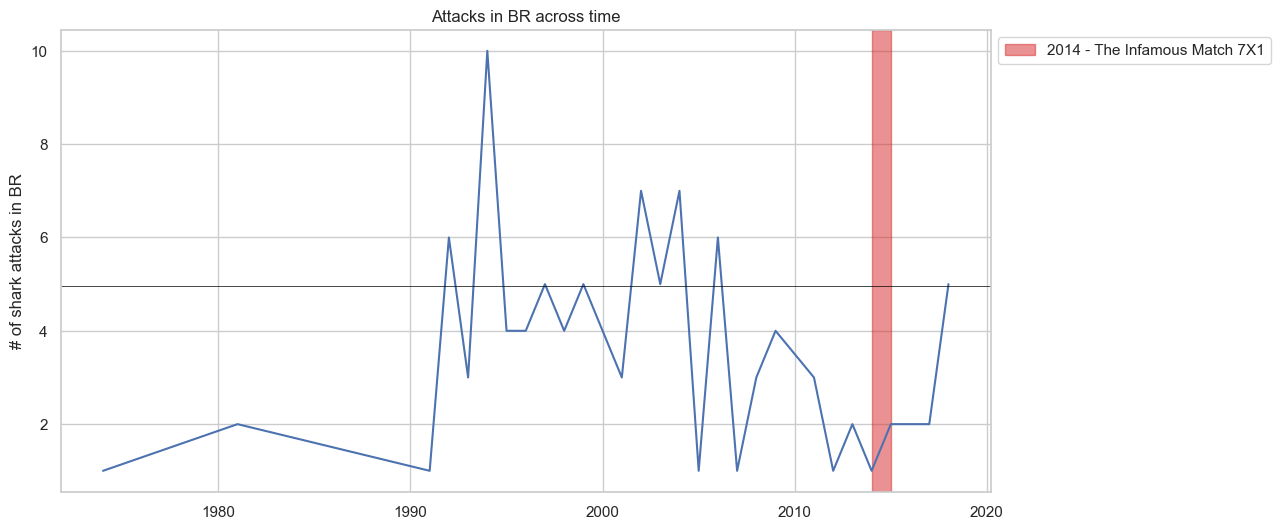

<Figure size 1200x600 with 0 Axes>

In [45]:
plt.plot(df_BR['Year'], df_BR["Year_counts"])


#adjust labels and title
plt.ylabel('# of shark attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.legend(bbox_to_anchor=(1, 1))


#Identify treshhold (median) to check for success criteria
plt.axhline(y=4.96, xmin=0, xmax=2022, c='black', linewidth=0.5)

#export graph to images folder
fig = plt.figure()
fig.savefig('images/Shark-attacks_BR_WC-2014.png', dpi=200, bbox_inches='tight')

### <span style="color:darkslateblue"> Q1.1: How was this reaction compared to other World Cups? </span>

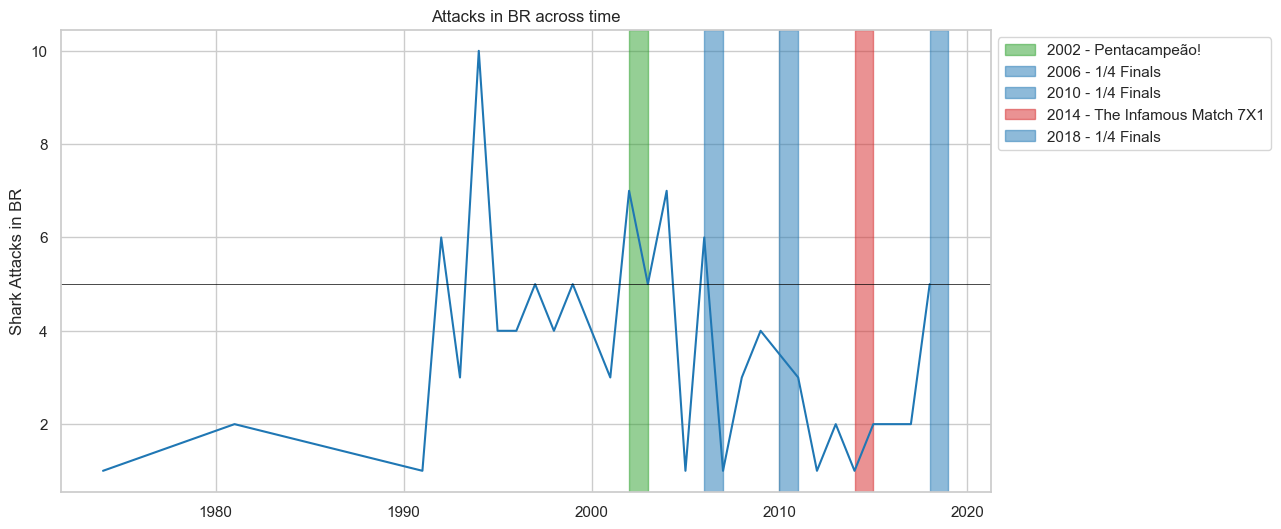

In [46]:

plt.plot(df_BR['Year'], df_BR["Year_counts"], color='tab:blue')



#adjust labels and title
plt.ylabel('Shark Attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2002,2003, color='tab:green', alpha=0.5, label="2002 - Pentacampeão!")
plt.axvspan(2006,2007, color='tab:blue', alpha=0.5, label="2006 - 1/4 Finals")
plt.axvspan(2010,2011, color='tab:blue', alpha=0.5, label="2010 - 1/4 Finals")
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.axvspan(2018,2019, color='tab:blue', alpha=0.5, label="2018 - 1/4 Finals")


plt.legend(bbox_to_anchor=(1, 1))


#Identify baseline (average) 
plt.axhline(y=5, xmin=0, xmax=2022, c='black', linewidth=0.5)



### <span style="color:lightslategrey; line-height:1.5em"> **Conclusion:** </span>

Data shows that _Brazilian_ sharks do not react negatively when Brazil loses in the World Cup at all, with numbers in those periods being in all time lows. 

In fact, the rise of the 'angryness factor' on the years leading to some World Cups (see 2002, 2006, 2010 and 2018) could indicate that _Brazilian_ _sharks_ are are generally against what some believe to be the Bread and Circus politics surrounding the event. Qualitative data (e.g. interview with the sharks), is needed for further analysis on that subject. 


## <span style="color:darkslateblue"> Q2: How angry were the _Brazilian_ sharks that did attack? </span>




In [47]:
# Extract subset data with only WC championship years.
# Ignore Type "Invalid" from Data.     
df_BR2 = df_BR.loc[(df_BR['Year'] == 2002) | (df_BR['Year'] == 2006) | (df_BR['Year'] == 2010) | (df_BR['Year'] == 2014) | (df_BR['Year'] == 2018) & (df_BR['Type'] != "Invalid"), ['Type','Year', "Fatal"]]


Text(2.7, 3.5, '*No provoked attacks registered')

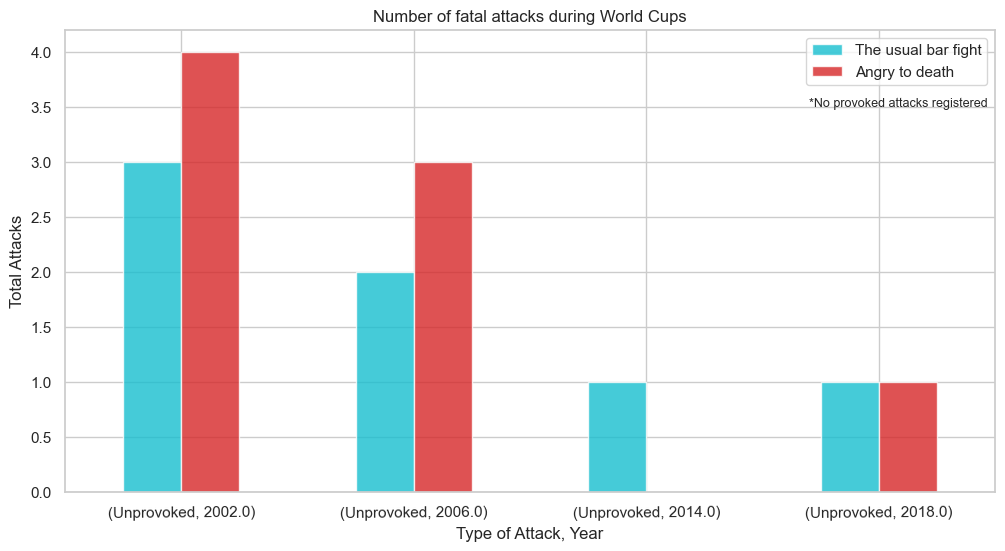

In [48]:
# group subset by Year, Type and Fatality 
#count number of Fatal and Non-Fatal attacks 
#plot result to bar chart. 

df_BR2.groupby(['Type', 'Year', 'Fatal'])['Fatal'].count().unstack().plot(kind='bar', title="Number of fatal attacks during World Cups", color=['tab:cyan', 'tab:red'], alpha=0.8)


#adjust labels and title
legend_labels = ["The usual bar fight", 'Angry to death']
plt.legend(labels=legend_labels)
plt.xticks(rotation=0.5)
plt.ylabel("Total Attacks")
plt.xlabel("Type of Attack, Year")

# place a text box in upper left in axes coords
plt.text(2.7, 3.5, '*No provoked attacks registered',fontsize=9)


### <span style="color:lightslategrey; line-height:1.5em"> **Conclusion:** </span>

Data shows that most fatal attacks happened when Brazil won the worldcup which is leading this researcher to believe that perhaps this is actually how sharks celebrate the world cup. Further research is required to understand sharks customs regarding sports. 


## <span style="color:darkslateblue"> BONUS Question: What was the "Angryness Factor" sharks from countries that made it to the finals in the same period? </span>

In [123]:
warnings.filterwarnings("ignore")

In [146]:
country_ = ['France', 'Croatia', 'Germany', 'Argentina', 'Spain', 'Netherlands', 'Italy', 'Germany']

In [147]:
df_global = df[df['Country'].isin(country_)]
df_global['Country'].value_counts()

Italy        71
Spain        44
Croatia      34
France       13
Argentina     1
Name: Country, dtype: int64

In [148]:
df_global.sample()

,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
4232,4233,1956.09.00.a,Sep-1956,1956.0,Unprovoked,Italy,Tyrrenian Sea,1.5 miles south of San Felice Circeo,Scuba diving,Goffredo Lombardo,...,"White shark, 13'10"", 1320-lb female","G. Bini, A. De Maddalena & C. Moore, GSAF",1956.09.00.a-Lombardo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.09.00.a,1956.09.00.a,2070.0,NaN,NaN


In [149]:
df_global.sample(10)

,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
5432,5433,1908.07.18.R,Reported 18-Jul-1908,1908.0,Invalid,Spain,Canary Islands,"Tazacorte, La Palma",NaN,NaN,...,Questionable,"C. Moore, GSAF",1908.07.18.R-LasPalmas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.07.18.R,1908.07.18.R,870.0,NaN,NaN
1442,1443,2006.08.20.b,20-Aug-2006,2006.0,Sea disaster,Italy,NaN,Lampedusa Island,Sea disaster,a refugee,...,NaN,IM/LR,2006.08.20.b-Lampedusa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.08.20.b,2006.08.20.b,4860.0,NaN,NaN
5532,5533,1902.07.15,15-Jul-1902,1902.0,Provoked,Italy,Liguria,"Galliera dock, Genoa",Fishing,male,...,NaN,"C. Moore, GSAF",1902.07.15-Genoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1902.07.15,1902.07.15,770.0,NaN,NaN
5385,5386,1911.07.31.R,Reported 31-Jul-1911,1911.0,Unprovoked,Spain,Málaga,Ceuta,Bathing,a soldier,...,NaN,C. Moore. GSAF,1911.07.31.R-Ceuta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1911.07.31.T,1911.07.31.R,917.0,NaN,NaN
4402,4403,1952.08.05,05-Aug-1952,1952.0,Provoked,Italy,Teramo,Giulianova,Fishing,Vittorio Speca,...,2m shark,"C. Moore, GSAF",1952.08.05-Speca.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.08.04,1952.08.05,1900.0,NaN,NaN
3524,3525,1967.06.00,Jun-1967,1967.0,Provoked,Italy,Sicily,Stretto di Messina,Fishing boat,NaN,...,"White shark, 4 to 5 m [13' to 16.5']",A. De Maddalena; Giudici & Fino (1989),1967.06.00-Messina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967.06.00,1967.06.00,2778.0,NaN,NaN
3875,3876,1961.09.24.b,24-Sep-1961,1961.0,Unprovoked,Croatia,Primorje-Gorski Kotar County,"Opatija, northwestern coast of Rijeka Bay",Swimming,Sabit Plana,...,White shark,"The Mid-Ocean News, 9/28/1961; H.D. Baldridge,...",1961.09.24.b-Plana.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.09.24.b,1961.09.24.b,2427.0,NaN,NaN
4659,4660,1944.00.00.b,1944,1944.0,Sea disaster,Italy,Adriatic Sea,NaN,B-24 aircraft crashed into the sea,"male, a member of the crew",...,NaN,GSAF,1944.00.00.b-B-24 crew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.00.00.b,1944.00.00.b,1643.0,NaN,NaN
6178,6180,0000.0725,Ca. 725 B.C.,NaN,Sea disaster,Italy,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,...,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0,NaN,NaN
2097,2098,1999.09.24,24-Sep-1999,1999.0,Boating,Italy,Adriatic Sea,San Benedetto,Fishing,Boat “Coca Cola”,...,Said to involve a 7 m [23'] white shark,"Orlando Sentinel, 9/28/1999, p.A12",1999.09.24-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.09.24,1999.09.24,4205.0,NaN,NaN


In [150]:
tickers = list(df_global['Country'].unique())

In [151]:
# count the number of occurrences
df_global['Year_counts'] = df_global['Year'].apply(lambda x: (df_global['Year'] == x).sum())

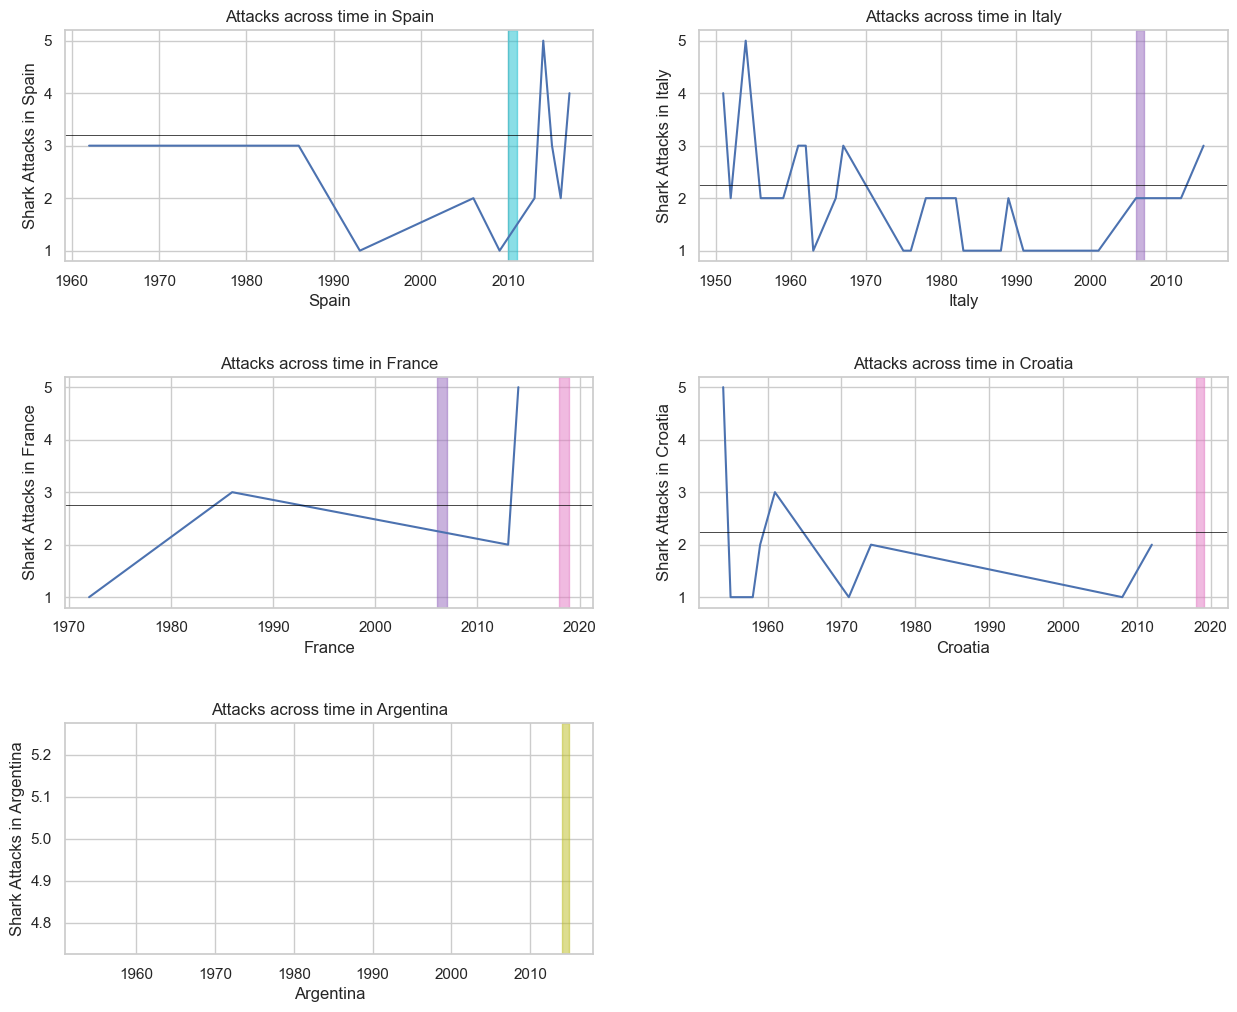

In [171]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n+1)
    df_new = df_global[df_global.Country==ticker]
    df_new = df_new[df_new['Year'] > 1950]
    
    plt.plot(df_new['Year'], df_new["Year_counts"])
    
    ax.set_xlabel(ticker)
    plt.ylabel(f'Shark Attacks in {ticker}')
    plt.title(f'Attacks across time in {ticker}')
    
    
    #add average line, except for argentina that does not have occurrences
    if ticker != "Argentina":
        plt.axhline(y=df_new["Year_counts"].mean(), xmin=0, xmax=2022, c='black', linewidth=0.5)

    
    # add WC indentifier
    #1. 2018 - France vs Croatia 
    if ticker == 'France' or ticker == 'Croatia':
        plt.axvspan(2018,2019, color='tab:pink', alpha=0.5, label="2018")
    
    #2. 2014 - Germany vs Argentina
    if ticker == 'Germany' or ticker == 'Argentina':
        plt.axvspan(2014,2015, color='tab:olive', alpha=0.5, label="2014")
    
    #3 2010 - Spain vs Netherlands
    if ticker == 'Spain' or ticker == 'Netherlands':
        plt.axvspan(2010,2011, color='tab:cyan', alpha=0.5, label="2010")
    
    #4. 2006 - Italy vs France
    if ticker == 'Italy' or ticker == 'France':
        plt.axvspan(2006,2007, color='tab:purple', alpha=0.5, label="2006")
    
    #5. 2002 - Brazil vs Germany   
    #plt.axvspan(2002,2003, color='tab:green', alpha=0.5, label="2002 - Pentacampeão!")
    